In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
data = {
    'Date' : pd.date_range(start='2025-01-01', periods=100),
    'Price' : np.cumsum(np.random.randn(100) * 5 + 50)
}

df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Day'] = np.arange(len(df))

In [11]:
x = df[['Day']]
y = df['Price']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

pred = lr_model.predict(x_test)

mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mse)

r2 = r2_score(pred, y_test)

print("RMSE for Linear Regression : ", rmse)
print("R2 for Linear Regression : ", r2)


RMSE for Linear Regression :  10.225259733522117
R2 for Linear Regression :  0.9999474967705609


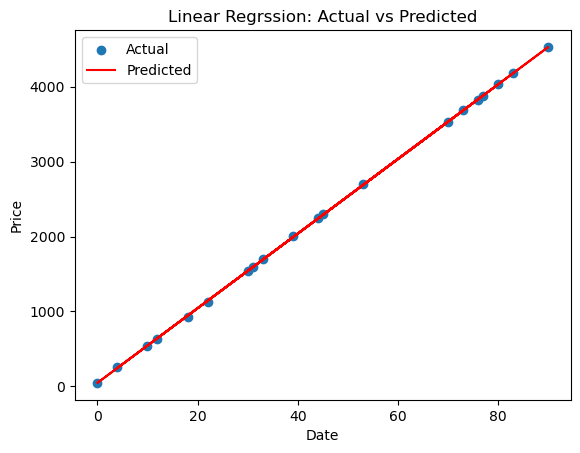

In [80]:
plt.scatter(x_test, y_test, label="Actual")
plt.plot(x_test, pred, label="Predicted", color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Linear Regrssion: Actual vs Predicted")
plt.legend()

In [66]:
train_size = int(len(df)*0.8)
train, test = df[:train_size], df[train_size:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

tsa_model = ExponentialSmoothing(train['Price'], trend='add')
tsa_model_fit = tsa_model.fit()

tsa_prediction = tsa_model_fit.forecast(len(test))

mse = mean_squared_error(test['Price'], tsa_prediction)
rmse = np.sqrt(mse)

print(f"RMSE for Time Series {rmse}")

RMSE for Time Series 10.603499693412257


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


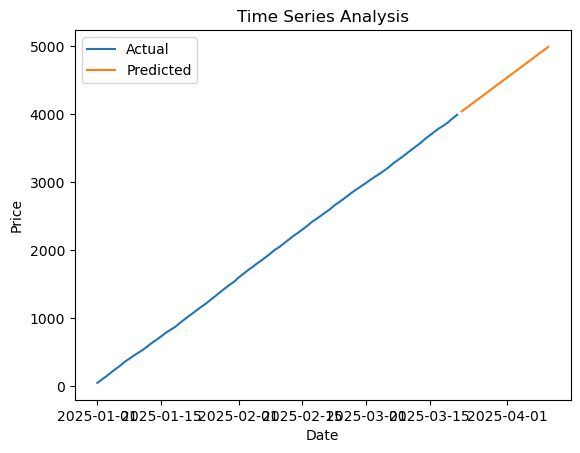

In [76]:
plt.plot(train['Price'], label="Actual")
plt.plot(tsa_prediction, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Time Series Analysis")
plt.legend()